In [1]:
import pandas as pd
df = pd.read_csv('../logs/all_slurm-17824621.csv')
df

,fold,n_components,error
0,1,1,38.83
1,1,1,40.65
2,1,1,40.24
3,1,1,38.77
4,1,1,39.13
5,1,1,39.94
6,1,1,38.97
7,1,1,37.55
8,1,1,37.15
9,1,1,38.93


Text(0.5, 1.0, 'Classification error vs `n_components` parameter')

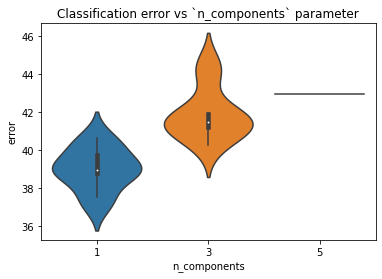

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(data=df, x='n_components', y='error')
plt.title('Classification error vs `n_components` parameter')